In [46]:
#Imports
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
#Url to data and sets the df veriable to hold the data from the link
url = 'https://raw.githubusercontent.com/atikagondal/Lab-2023-DAVE3625/main/Lab3/data/flight.csv'
df = pd.read_csv(url)

#Converts the columns to datetime type, we have errors = coerce to put a NaN value if we have errors
df['datetime_val'] = pd.to_datetime(df['datetime_val'], errors='coerce')
df['dep_time'] = pd.to_datetime(df['dep_time'], errors='coerce')
df['arr_time'] = pd.to_datetime(df['arr_time'], errors='coerce')
df['sched_arr_time'] = pd.to_datetime(df['sched_arr_time'], errors='coerce')

#Calculates and defines variable air_time
df['air_time'] = df['arr_time'] - df['dep_time']
df['delay'] = df['arr_time'] - df['sched_arr_time']

for index, row in df.iterrows():
    #if arr_time is less then dep_time
    if (row['arr_time']<row['dep_time']):
        #add one day to arr_time
        df.loc[index, 'arr_time'] = (row['arr_time'])+ datetime.timedelta(days=1)
    if (row['sched_arr_time']<row['dep_time']):
        df.loc[index, 'sched_arr_time'] = (row['sched_arr_time'])+ datetime.timedelta(days=1)

    #For every row in df
for index, row in df.iterrows():
    #if air_time is negative
    if (row['air_time'].days < 0):
        #Find the row with df.loc                      Take 24 hrs, - air_time + negative days (could be replaced with 1)
        df.loc[index, 'air_time'] = datetime.timedelta(hours=24)-(row['air_time'] + datetime.timedelta(abs(row['air_time'].days)))
        df['percent_delay'] = (100 * df['delay'])/df['air_time']
#Print of table
df

,Unnamed: 0,datetime_val,dep_time,arr_time,sched_arr_time,flight,origin,dest,air_time,delay,percent_delay
0,0,2013-01-01 05:40:00,2013-01-01 05:42:00,2013-01-01 09:23:00,2013-01-01 08:50:00,1141,JFK,MIA,0 days 03:41:00,0 days 00:33:00,14.932127
1,1,2013-01-01 06:00:00,2013-01-01 05:54:00,2013-01-01 08:12:00,2013-01-01 08:37:00,461,LGA,ATL,0 days 02:18:00,-1 days +23:35:00,-18.115942
2,2,2013-01-01 05:58:00,2013-01-01 05:54:00,2013-01-01 07:40:00,2013-01-01 07:28:00,1696,EWR,ORD,0 days 01:46:00,0 days 00:12:00,11.320755
3,3,2013-01-01 06:00:00,2013-01-01 05:55:00,2013-01-01 09:13:00,2013-01-01 08:54:00,507,EWR,FLL,0 days 03:18:00,0 days 00:19:00,9.595960
4,4,2013-01-01 06:00:00,2013-01-01 05:57:00,2013-01-01 08:38:00,2013-01-01 08:46:00,79,JFK,MCO,0 days 02:41:00,-1 days +23:52:00,-4.968944
...,...,...,...,...,...,...,...,...,...,...,...
121422,123979,2013-09-30 21:37:00,2013-09-30 21:47:00,2013-10-01 00:30:00,2013-10-01 00:27:00,1371,LGA,FLL,0 days 21:17:00,0 days 00:03:00,0.234926
121423,123980,2013-09-30 21:56:00,2013-09-30 21:49:00,2013-09-30 22:45:00,2013-09-30 23:08:00,523,EWR,BOS,0 days 00:56:00,-1 days +23:37:00,-41.071429
121424,123981,2013-09-30 21:13:00,2013-09-30 22:33:00,2013-10-01 01:12:00,2013-10-01 00:30:00,471,EWR,SFO,0 days 21:21:00,0 days 00:42:00,3.278689
121425,123982,2013-09-30 20:01:00,2013-09-30 22:35:00,2013-10-01 00:59:00,2013-09-30 22:49:00,1083,JFK,MCO,0 days 21:36:00,-1 days +02:10:00,-101.080247


<Axes: >

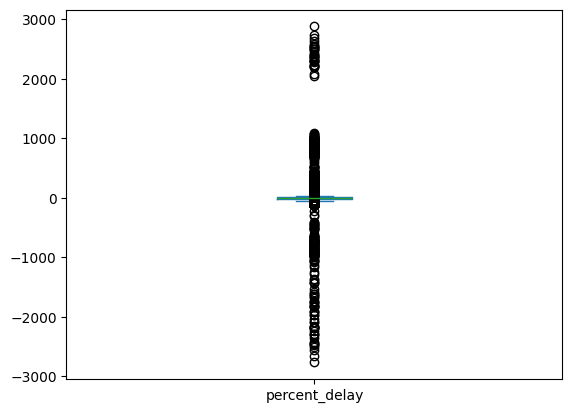

In [47]:
#Boxplot of percent delay
df['percent_delay'].plot.box()

In [48]:
#
minrow= df['percent_delay'].argmin()
df.iloc[minrow]

Unnamed: 0                      27395
datetime_val      2013-11-21 22:55:00
dep_time          2013-11-21 00:33:00
arr_time          2013-11-21 01:22:00
sched_arr_time    2013-11-21 23:56:00
flight                            718
origin                            JFK
dest                              BOS
air_time              0 days 00:49:00
delay               -1 days +01:26:00
percent_delay            -2763.265306
Name: 27117, dtype: object

In [49]:
df['percent_delay'].describe()

count    121373.000000
mean         -0.115552
std          82.551857
min       -2763.265306
25%         -14.545455
50%          -4.487179
75%           6.250000
max        2879.591837
Name: percent_delay, dtype: float64

In [50]:
from pandas.api.types import is_numeric_dtype
#Function that will remove outliers
def remove_outlier(df):
    low = .05
    high = .95
    quant_df = df.quantile([low, high])
    if is_numeric_dtype(df):
        df = df[(df > quant_df.loc[low]) & (df < quant_df.loc[high])]
    return df

df["percent_delay"] = remove_outlier(df["percent_delay"])

df

,Unnamed: 0,datetime_val,dep_time,arr_time,sched_arr_time,flight,origin,dest,air_time,delay,percent_delay
0,0,2013-01-01 05:40:00,2013-01-01 05:42:00,2013-01-01 09:23:00,2013-01-01 08:50:00,1141,JFK,MIA,0 days 03:41:00,0 days 00:33:00,14.932127
1,1,2013-01-01 06:00:00,2013-01-01 05:54:00,2013-01-01 08:12:00,2013-01-01 08:37:00,461,LGA,ATL,0 days 02:18:00,-1 days +23:35:00,-18.115942
2,2,2013-01-01 05:58:00,2013-01-01 05:54:00,2013-01-01 07:40:00,2013-01-01 07:28:00,1696,EWR,ORD,0 days 01:46:00,0 days 00:12:00,11.320755
3,3,2013-01-01 06:00:00,2013-01-01 05:55:00,2013-01-01 09:13:00,2013-01-01 08:54:00,507,EWR,FLL,0 days 03:18:00,0 days 00:19:00,9.595960
4,4,2013-01-01 06:00:00,2013-01-01 05:57:00,2013-01-01 08:38:00,2013-01-01 08:46:00,79,JFK,MCO,0 days 02:41:00,-1 days +23:52:00,-4.968944
...,...,...,...,...,...,...,...,...,...,...,...
121422,123979,2013-09-30 21:37:00,2013-09-30 21:47:00,2013-10-01 00:30:00,2013-10-01 00:27:00,1371,LGA,FLL,0 days 21:17:00,0 days 00:03:00,0.234926
121423,123980,2013-09-30 21:56:00,2013-09-30 21:49:00,2013-09-30 22:45:00,2013-09-30 23:08:00,523,EWR,BOS,0 days 00:56:00,-1 days +23:37:00,NaN
121424,123981,2013-09-30 21:13:00,2013-09-30 22:33:00,2013-10-01 01:12:00,2013-10-01 00:30:00,471,EWR,SFO,0 days 21:21:00,0 days 00:42:00,3.278689
121425,123982,2013-09-30 20:01:00,2013-09-30 22:35:00,2013-10-01 00:59:00,2013-09-30 22:49:00,1083,JFK,MCO,0 days 21:36:00,-1 days +02:10:00,NaN


count    109218.000000
mean         -3.189471
std          15.795095
min         -37.908497
25%         -13.368984
50%          -4.477612
75%           4.761905
max          50.625000
Name: percent_delay, dtype: float64

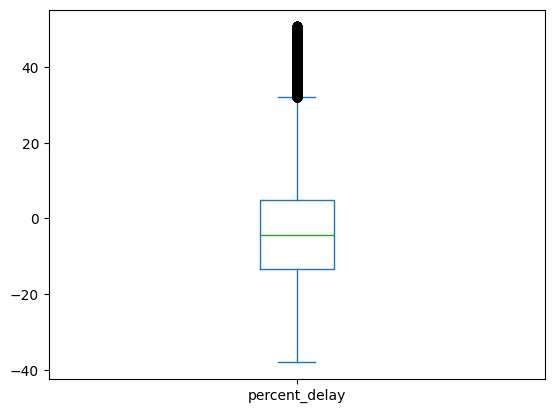

In [51]:
df['percent_delay'].plot.box()
df['percent_delay'].describe()